In [8]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggrepel))
suppressPackageStartupMessages(library(patchwork))
library(parallel)
library(data.table)
library(cowplot)
library(ggsci)
library(aplot)
library(EnhancedVolcano)

options(warn=-1)

ERROR: Error in library(aplot): there is no package called ‘aplot’


In [9]:
#load libraries
quiet_library <- function(...) {
    suppressPackageStartupMessages(library(...))
}
quiet_library(tidyverse)
quiet_library(Seurat)
quiet_library(ggplot2)
quiet_library(Matrix)
#quiet_library(H5weaver)
quiet_library(dplyr)
quiet_library(viridis)
quiet_library(harmony)
#quiet_library(Nebulosa)
quiet_library(future)
quiet_library(future.apply)
#quiet_library(H5weaver)
quiet_library(SingleCellExperiment)
#quiet_library(scCustomize)
quiet_library(SeuratDisk)
#quiet_library(SeuratData)
quiet_library(ggpubr)
quiet_library(knitr)
quiet_library(plotly)

## file_list - Male

In [295]:
file_list<-list.files(path = paste0("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male"), pattern = ".csv", all.files = FALSE,
           full.names = TRUE, recursive = FALSE,
           ignore.case = FALSE, include.dirs = TRUE, no.. = FALSE)
#file_list

In [296]:
DEG_list<-mclapply(file_list,read.csv,mc.cores=length(file_list))
DEG<-do.call(rbind,DEG_list)

In [297]:
DEG<- DEG%>% mutate(Expression = case_when(log2FoldChange >=0.1 & padj <= 0.1 ~ "Up-regulated in BR2",
                                                     log2FoldChange <= -0.1 & padj <= 0.1 ~ "Down-regulated in BR2",
                                                     TRUE ~ "Unchanged"))

In [298]:
DEG<-DEG %>% filter(Year=='Y1')

In [299]:
freq <- DEG %>% mutate(Expression = case_when(log2FoldChange >=0.1 & padj <= 0.1 ~ "Up-regulated in BR2",
                                                     log2FoldChange <= -0.1 & padj <= 0.1 ~ "Down-regulated in BR2",
                                                     TRUE ~ "Unchanged")) %>% filter(!Expression=='Unchanged')%>%
  group_by(celltype, Expression) %>%
  summarise(count = n())
freq<-freq %>% mutate (count=case_when(Expression=="Down-regulated in BR2"~-count,TRUE~count))

`summarise()` has grouped output by 'celltype'. You can override using the
`.groups` argument.


In [300]:
orders<-freq
orders$count<-abs(orders$count)
orders<-orders%>%
  group_by(celltype) %>%
  summarize(value = sum(count))%>%arrange(desc(value)) %>% select (celltype) %>% pull()

In [301]:
options(repr.plot.width = 10, repr.plot.height = 5)
#orders<-unique(freq %>% arrange(desc(count)) %>% select (celltype) %>% pull())
freq$celltype<-factor(freq$celltype,levels=orders)
p1<-ggplot(freq, aes(x = celltype, y = count, fill = Expression)) +
  geom_bar(stat = "identity", position = "identity") +theme_bw(base_size=12)+  scale_fill_aaas()+
  labs(x = "celltype", y = "DEG_Counts") +  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 15)) + guides(fill = guide_legend(reverse = TRUE))+
  ylim(-170,170)

In [302]:
total_gene <- DEG  %>%
  group_by(celltype) %>%
  summarise(count = n())
total_gene$celltype<-factor(total_gene$celltype,levels=orders)

In [303]:
p2<-ggplot(total_gene, aes(x = celltype, y = count)) +
  geom_bar(stat = "identity", position = "identity") +
  labs(x = "celltype", y = "Total_Genes_Expressed")+theme_bw(base_size=12)+
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+ylab('N_Genes')

In [304]:
options(repr.plot.width = 12, repr.plot.height = 8)

p3<-p1 %>% insert_top(p2,height=0.7)

p3



ERROR: Error in insert_top(., p2, height = 0.7): could not find function "insert_top"


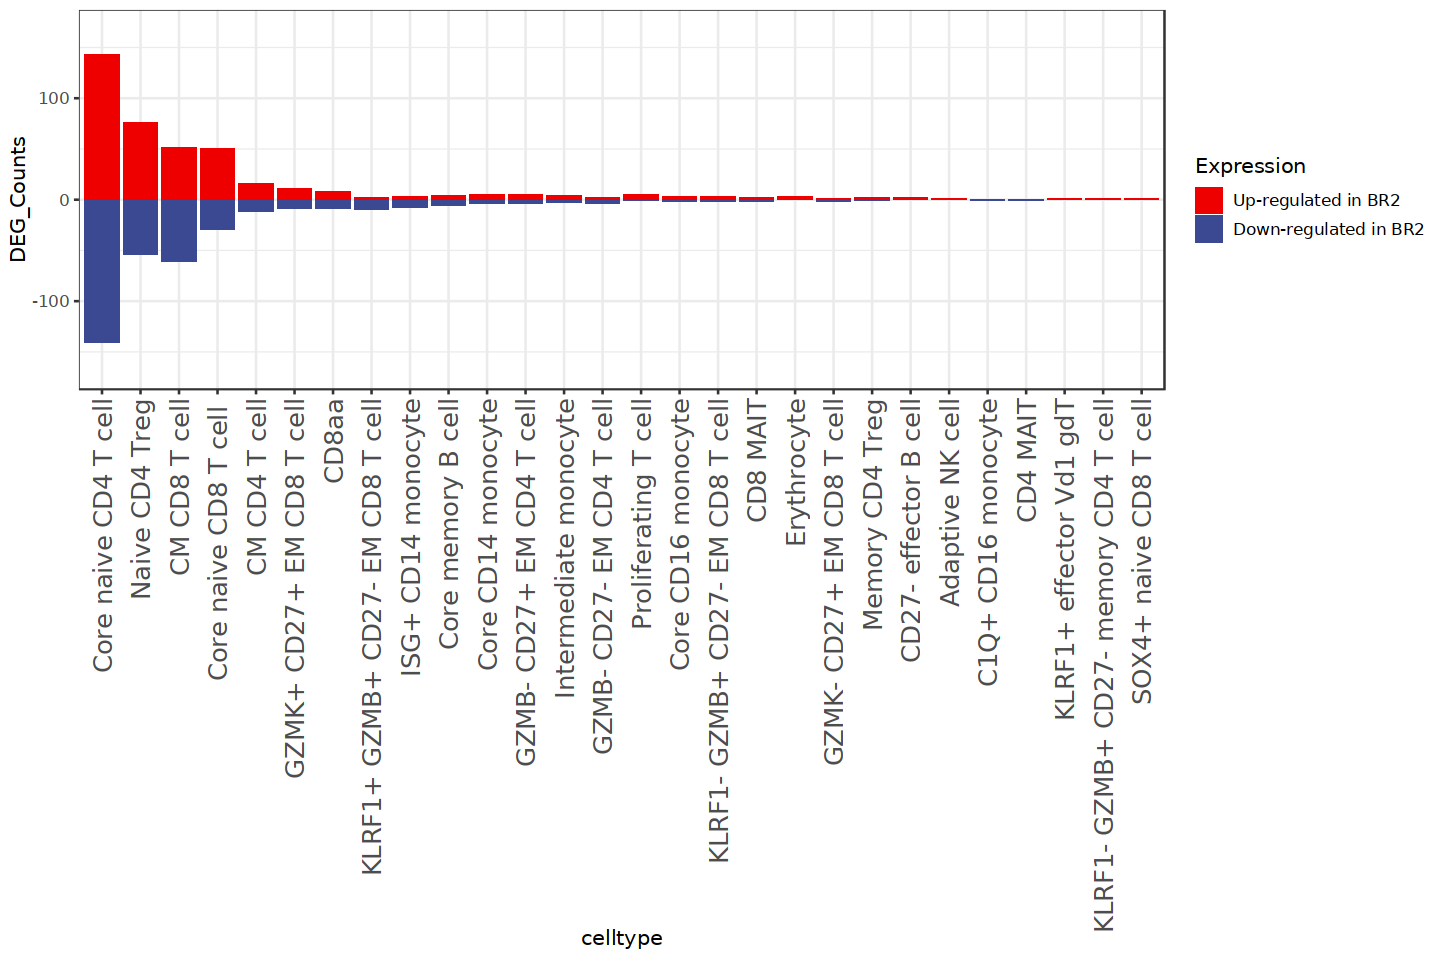

In [305]:
p1

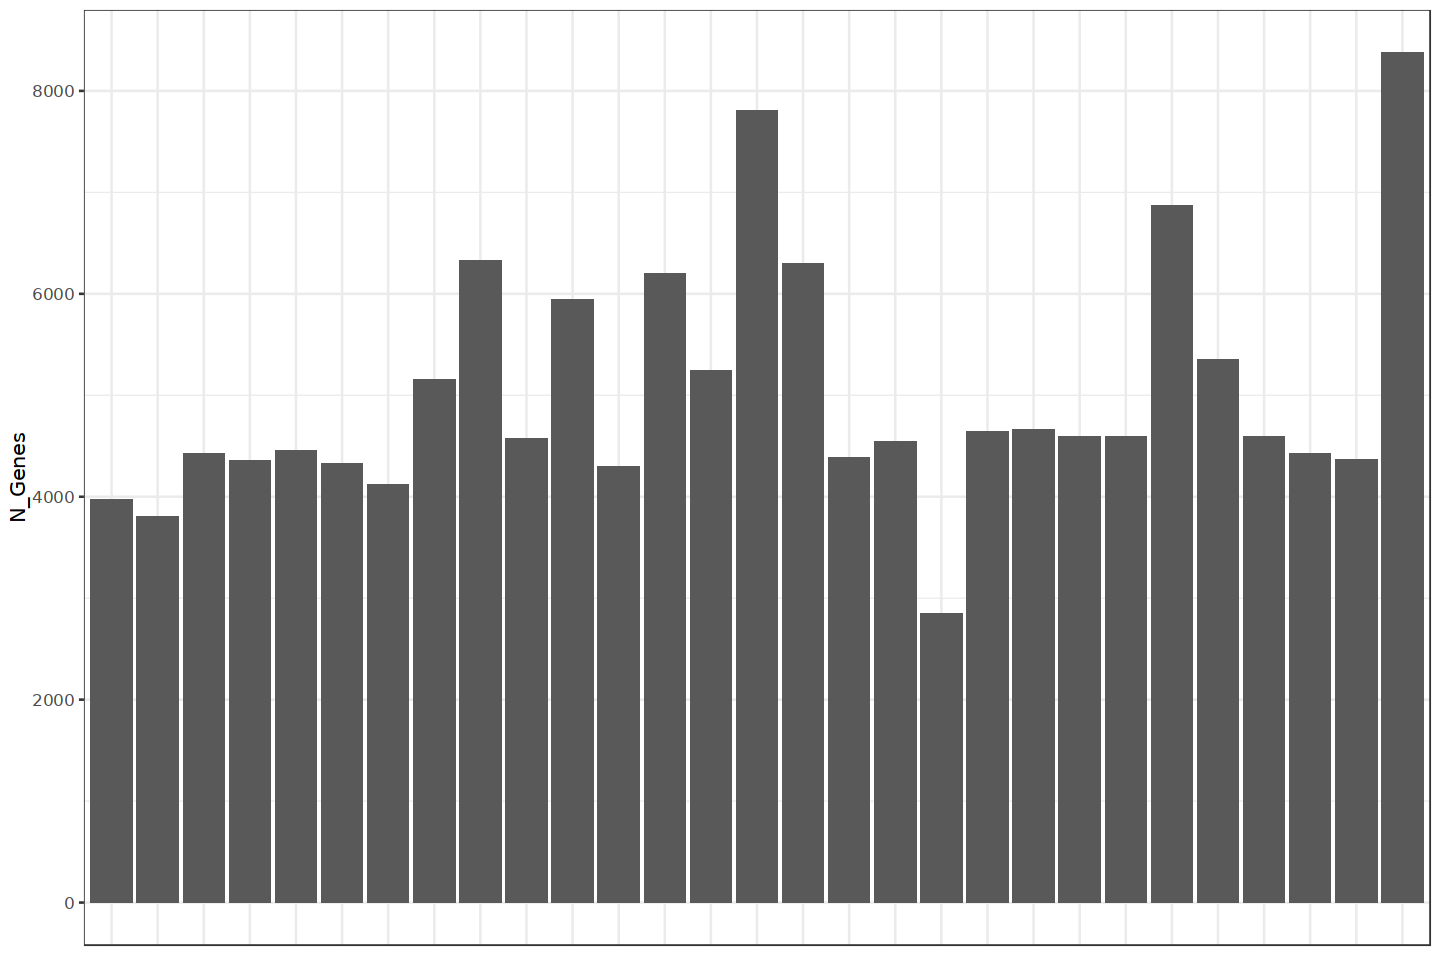

In [245]:
p2

## file_list - Female

In [406]:
file_list<-list.files(path = paste0("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female_CMV_Test_3"), pattern = ".csv", all.files = FALSE,
           full.names = TRUE, recursive = FALSE,
           ignore.case = FALSE, include.dirs = TRUE, no.. = FALSE)

In [407]:
DEG_list<-mclapply(file_list,read.csv,mc.cores=length(file_list))
DEG<-do.call(rbind,DEG_list)

In [408]:
DEG<- DEG%>% mutate(Expression = case_when(log2FoldChange >=0.1 & padj <= 0.1 ~ "Up-regulated in BR2",
                                                     log2FoldChange <= -0.1 & padj <= 0.1 ~ "Down-regulated in BR2",
                                                     TRUE ~ "Unchanged"))

In [409]:
DEG<-DEG %>% filter(Year=='Y1')

In [410]:
freq <- DEG %>% mutate(Expression = case_when(log2FoldChange >=0.1 & padj <= 0.1 ~ "Up-regulated in BR2",
                                                     log2FoldChange <= -0.1 & padj <= 0.1 ~ "Down-regulated in BR2",
                                                     TRUE ~ "Unchanged")) %>% filter(!Expression=='Unchanged')%>%
  group_by(celltype, Expression) %>%
  summarise(count = n())
freq<-freq %>% mutate (count=case_when(Expression=="Down-regulated in BR2"~-count,TRUE~count))

`summarise()` has grouped output by 'celltype'. You can override using the
`.groups` argument.


In [411]:
orders<-freq
orders$count<-abs(orders$count)
orders<-orders%>%
  group_by(celltype) %>%
  summarize(value = sum(count))%>%arrange(desc(value)) %>% select (celltype) %>% pull()

In [412]:
options(repr.plot.width = 10, repr.plot.height = 5)
#orders<-unique(freq %>% arrange(desc(count)) %>% select (celltype) %>% pull())
freq$celltype<-factor(freq$celltype,levels=orders)
p1<-ggplot(freq, aes(x = celltype, y = count, fill = Expression)) +
  geom_bar(stat = "identity", position = "identity") +theme_bw(base_size=12)+  scale_fill_aaas()+
  labs(x = "celltype", y = "DEG_Counts") +  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 15))+guides(fill = guide_legend(reverse = TRUE))+
  ylim(-170,170)

In [413]:
total_gene <- DEG  %>%
  group_by(celltype) %>%
  summarise(count = n())
total_gene$celltype<-factor(total_gene$celltype,levels=orders)

In [414]:
p2<-ggplot(total_gene, aes(x = celltype, y = count)) +
  geom_bar(stat = "identity", position = "identity") +
  labs(x = "celltype", y = "Total_Genes_Expressed")+theme_bw(base_size=12)+
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+ylab('N_Genes')

In [415]:
options(repr.plot.width = 12, repr.plot.height = 8)

p3<-p1 %>% insert_top(p2,height=0.7)

p3



ERROR: Error in insert_top(., p2, height = 0.7): could not find function "insert_top"


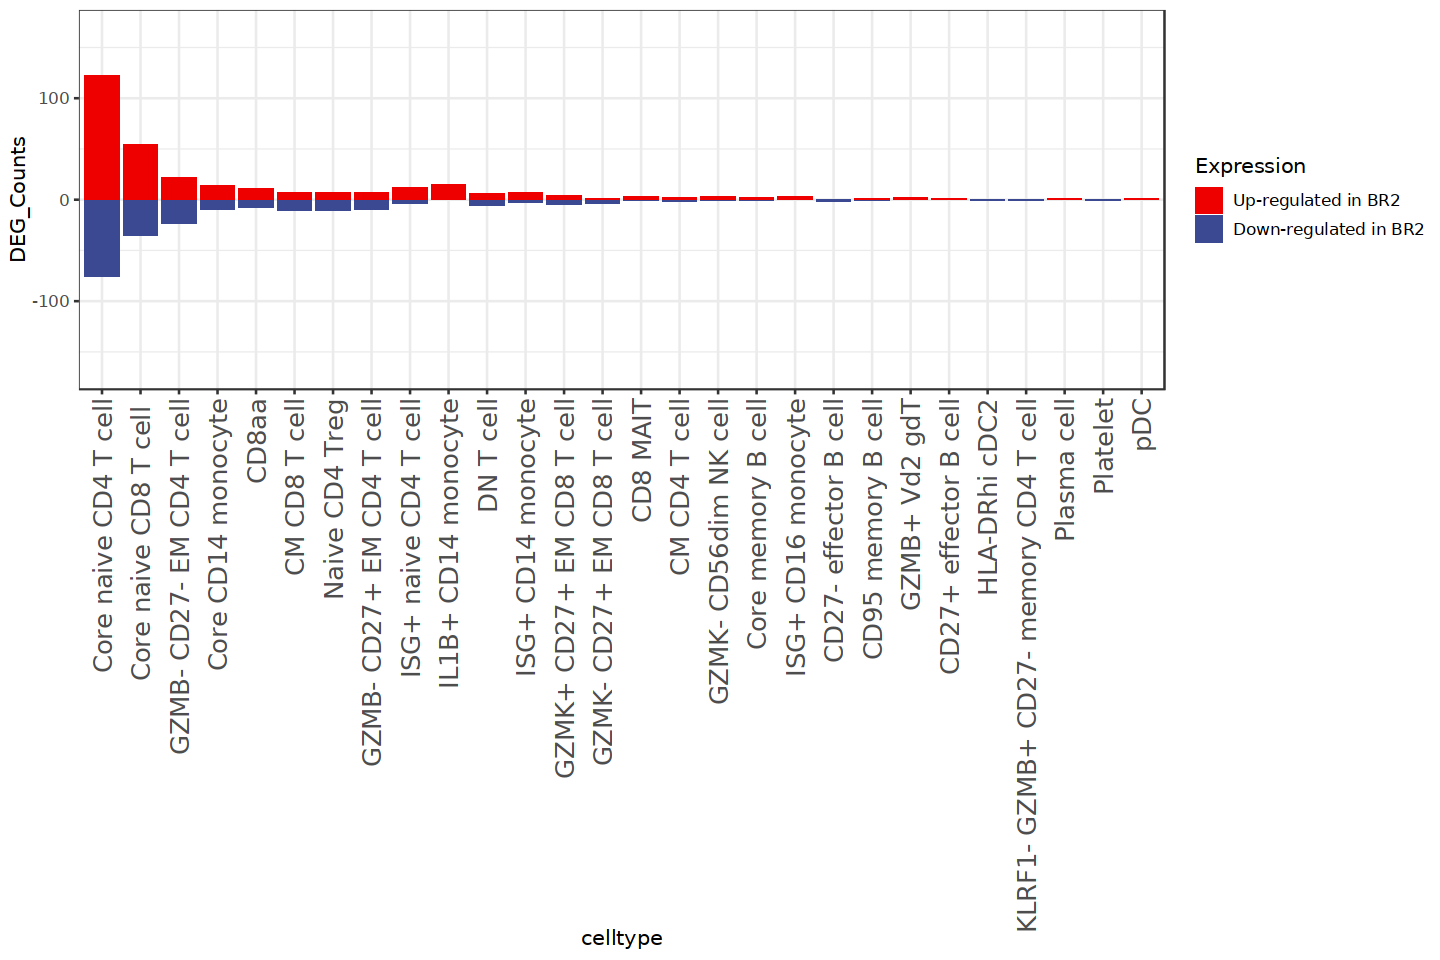

In [416]:
p1

In [ ]:
p2

# Volcano Plot


In [30]:
data <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male/IL1B+ CD14 monocyte_Y1D0.csv")


In [61]:
data <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female/IL1B+ CD14 monocyte_Y1D0.csv")


In [62]:
head(data)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,celltype,Direction,Year
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,BCL2A1,34.515393,1.0146767,0.1737886,5.838570,5.265087e-09,0.0000108882,IL1B+ CD14 monocyte,BR2,Y1
2,PTGS2,18.262251,1.0483899,0.2195651,4.774848,1.798429e-06,0.0018595757,IL1B+ CD14 monocyte,BR2,Y1
3,NLRP3,8.916142,0.8007832,0.1789410,4.475124,7.636687e-06,0.0052642232,IL1B+ CD14 monocyte,BR2,Y1
4,RASGEF1B,12.182219,1.0262857,0.2352594,4.362359,1.286677e-05,0.0066521193,IL1B+ CD14 monocyte,BR2,Y1
5,IL1B,55.745095,1.1557310,0.2684734,4.304824,1.671182e-05,0.0069120094,IL1B+ CD14 monocyte,BR2,Y1
6,CMTM6,23.185185,0.4381138,0.1075105,4.075081,4.599836e-05,0.0140965154,IL1B+ CD14 monocyte,BR2,Y1


In [63]:
#install.packages("EnhancedVolcano")

In [64]:
# PlotVolcano <- function(deg_list, celltype){
#     degs_list_fl <- deg_list %>% dplyr::filter(celltype == celltype)
 
#     p1 <- EnhancedVolcano::EnhancedVolcano(degs_list_fl,
#                           title = NULL,
#                           subtitle = paste("AIM 1:",celltype),  # Add cell type as subtitle
#             lab = degs_list_fl %>% pull(genes),
#             x = 'log2FoldChange',
#             FCcutoff = 0.1,
#             pCutoff = 0.05,
#             y = 'padj', labSize = 4.0) +
#             coord_cartesian(xlim = c(-0.8, 0.8), ylim = c(0, 6)) +  # Adjust ylim here
#             theme(legend.position = "top", legend.title = element_blank(),
#                  #text = element_text(size = 10, face = "bold"),  # Make all text bold
#                  axis.title = element_text(face = "bold"),  # Make axis titles bold
#                  axis.text = element_text(size = 12))  # Adjust size of axis text
#     return(p1)
# }

# library(EnhancedVolcano)
# options(repr.plot.width = 10, repr.plot.height = 10)
# PlotVolcano(degs,'IL1B+ CD14 monocyte')

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


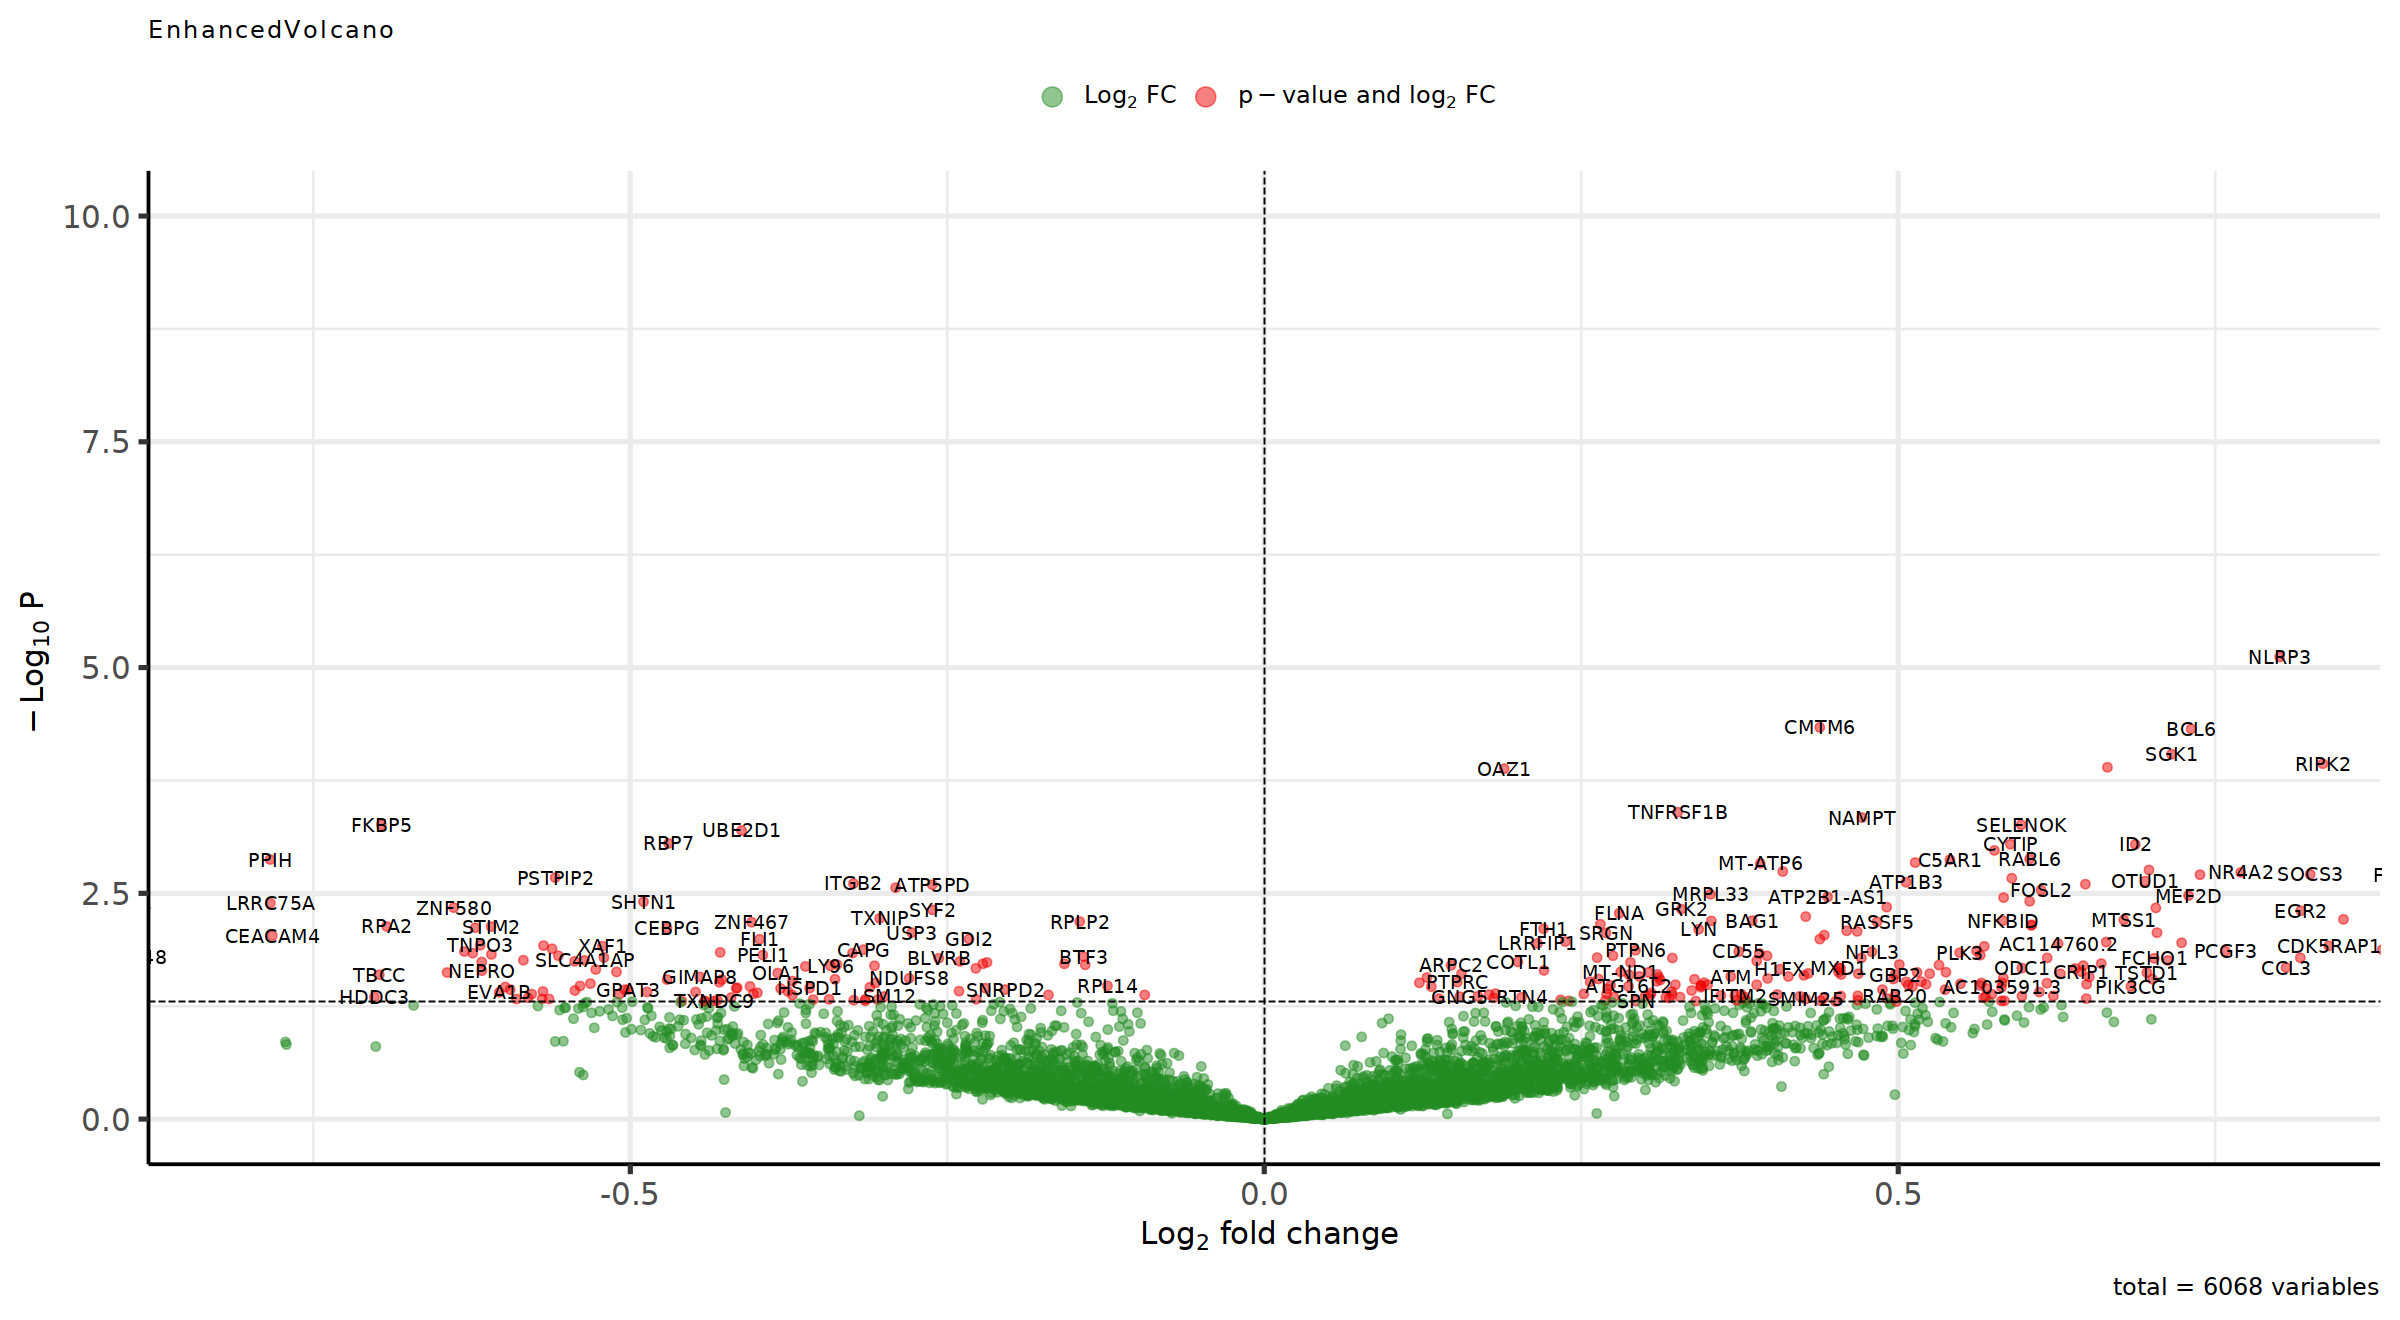

In [67]:
 p1 <- EnhancedVolcano::EnhancedVolcano(data,
                          title = NULL,
                          #subtitle = paste("AIM 1:"),  # Add cell type as subtitle
            lab = data$X,
            x = 'log2FoldChange',
            FCcutoff = 0,
            pCutoff = 0.05,
            y = 'pvalue', labSize = 4.0) +
            coord_cartesian(xlim = c(-0.8, 0.8), ylim = c(0, 10)) +  # Adjust ylim here
            theme(legend.position = "top", legend.title = element_blank(),
                 #text = element_text(size = 10, face = "bold"),  # Make all text bold
                 axis.title = element_text(face = "bold"),  # Make axis titles bold
                 axis.text = element_text(size = 12))  # Adjust size of axis text
    return(p1)

In [44]:
head(data)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,celltype,Direction,Year
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,BCL2A1,34.515393,1.0146767,0.1737886,5.838570,5.265087e-09,0.0000108882,IL1B+ CD14 monocyte,BR2,Y1
2,PTGS2,18.262251,1.0483899,0.2195651,4.774848,1.798429e-06,0.0018595757,IL1B+ CD14 monocyte,BR2,Y1
3,NLRP3,8.916142,0.8007832,0.1789410,4.475124,7.636687e-06,0.0052642232,IL1B+ CD14 monocyte,BR2,Y1
4,RASGEF1B,12.182219,1.0262857,0.2352594,4.362359,1.286677e-05,0.0066521193,IL1B+ CD14 monocyte,BR2,Y1
5,IL1B,55.745095,1.1557310,0.2684734,4.304824,1.671182e-05,0.0069120094,IL1B+ CD14 monocyte,BR2,Y1
6,CMTM6,23.185185,0.4381138,0.1075105,4.075081,4.599836e-05,0.0140965154,IL1B+ CD14 monocyte,BR2,Y1


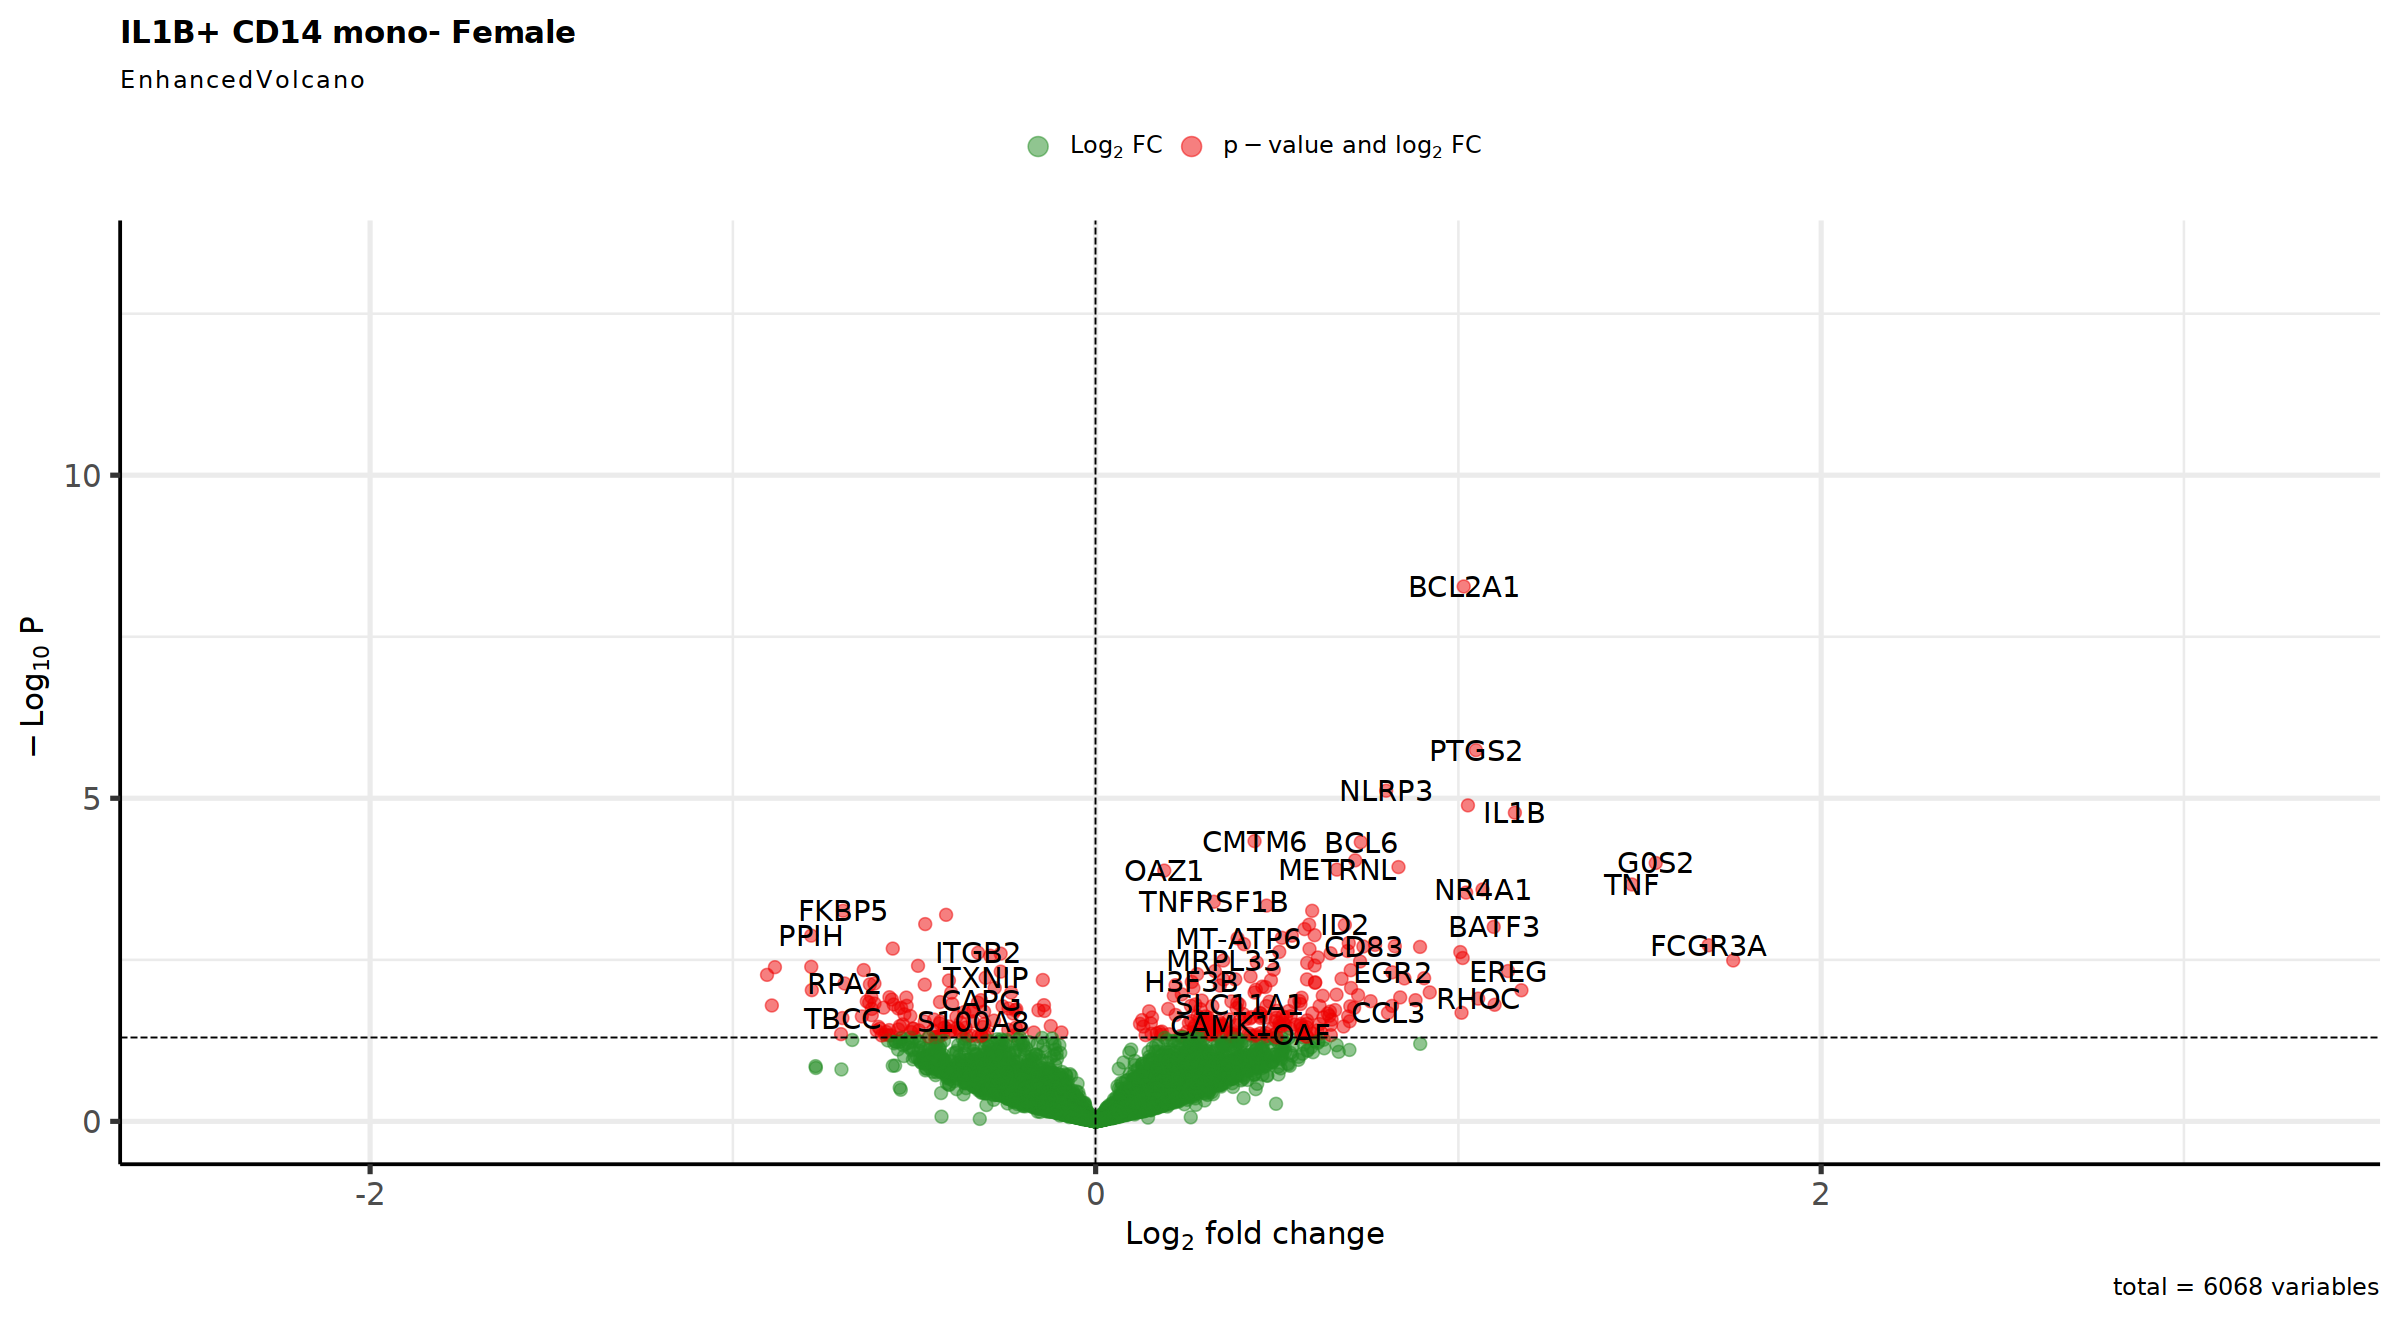

In [94]:
options(repr.plot.width=20, repr.plot.height=11) # Adjust these values as needed


EnhancedVolcano(data,
    lab = data$X,
    x = 'log2FoldChange',
    y = 'pvalue',
    title = 'IL1B+ CD14 mono- Female',
    pCutoff = 0.05,
    FCcutoff = 0,
    pointSize = 3.0,
    labSize = 6.0,)
    # coord_cartesian(xlim = c(-1, 1), ylim = c(0, 10)) +  # Adjust ylim here
    #         theme(legend.position = "top", legend.title = element_blank(),
    #              #text = element_text(size = 10, face = "bold"),  # Make all text bold
    #              axis.title = element_text(face = "bold"),  # Make axis titles bold
    #              axis.text = element_text(size = 12))

# IL1B+ Cd14 mono volcano plot

In [32]:
#Male
data <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/IL1B+ CD14 monocyte_Y1D0.csv")


In [19]:
#Female
data <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female/IL1B+ CD14 monocyte_Y1D0.csv")


In [20]:
head(data)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,celltype,Direction,Year
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,BCL2A1,34.515393,1.0146767,0.1737886,5.838570,5.265087e-09,0.0000108882,IL1B+ CD14 monocyte,BR2,Y1
2,PTGS2,18.262251,1.0483899,0.2195651,4.774848,1.798429e-06,0.0018595757,IL1B+ CD14 monocyte,BR2,Y1
3,NLRP3,8.916142,0.8007832,0.1789410,4.475124,7.636687e-06,0.0052642232,IL1B+ CD14 monocyte,BR2,Y1
4,RASGEF1B,12.182219,1.0262857,0.2352594,4.362359,1.286677e-05,0.0066521193,IL1B+ CD14 monocyte,BR2,Y1
5,IL1B,55.745095,1.1557310,0.2684734,4.304824,1.671182e-05,0.0069120094,IL1B+ CD14 monocyte,BR2,Y1
6,CMTM6,23.185185,0.4381138,0.1075105,4.075081,4.599836e-05,0.0140965154,IL1B+ CD14 monocyte,BR2,Y1


In [33]:
# Classify genes based on fold change and adjusted P-value
data$Color <- ifelse(data$padj < 0.1, ifelse(data$log2FoldChange > 0, "Upregulated in BR2", "Downregulated in BR2"), "Unchanged")


In [34]:
# # Assuming 'df' is your dataframe and 'column_name' is the name of the column
# rows_with_na <- data[is.na(data$Color), ]

# # View the rows with NA values in the specified column
# print(rows_with_na)

In [35]:
#remove columns that are NAs due to it being NA in padj from deseq2 run
data <- data[complete.cases(data$Color), ]

In [36]:
top <- 30
top_genes <- bind_rows(
  data %>% 
    filter(Color == 'Upregulated in BR2') %>% 
    arrange(padj, desc(abs(log2FoldChange))) %>% 
    head(top),
  data %>% 
    filter(Color == 'Downregulated in BR2') %>% 
    arrange(padj, desc(abs(log2FoldChange))) %>% 
    head(top))

In [37]:
unique(data$Color)

[1] "Unchanged"

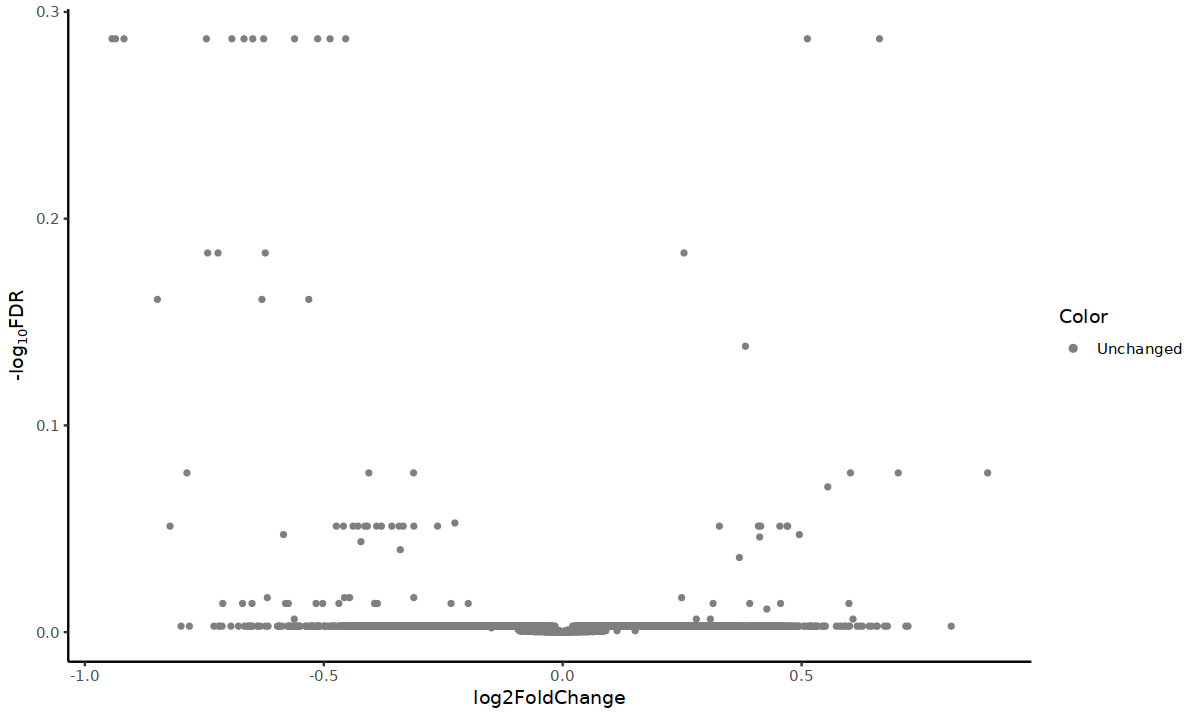

In [38]:


# Sorting data to find top 25 genes by P-value
#top_genes <- data[order(data$padj),][1:50,]

options(repr.plot.width = 10, repr.plot.height = 6)

ggplot(data, aes(log2FoldChange, -log(padj,10))) +
  geom_point(aes(color = Color), size = 1) +
  xlab(expression("log2FoldChange")) + 
  ylab(expression("-log"[10]*"FDR")) +
  scale_color_manual(values = c("Downregulated in BR2"="dodgerblue3", "Unchanged"="gray50", "Upregulated in BR2"="firebrick3")) +
  guides(colour = guide_legend(override.aes = list(size=1.5))) +
  geom_text_repel(data = top_genes,box.padding = 0.5,force= 0.5,max.overlaps=50,
    nudge_x           = 0.15,
    hjust             = 0.1,
    segment.size      = 0.1,
                   mapping = aes(log2FoldChange, -log(padj,10), label = X),
                   size = 4)+theme_classic()

Warning message:
“Removed 4000 rows containing missing values or values outside the scale range
(`geom_point()`).”


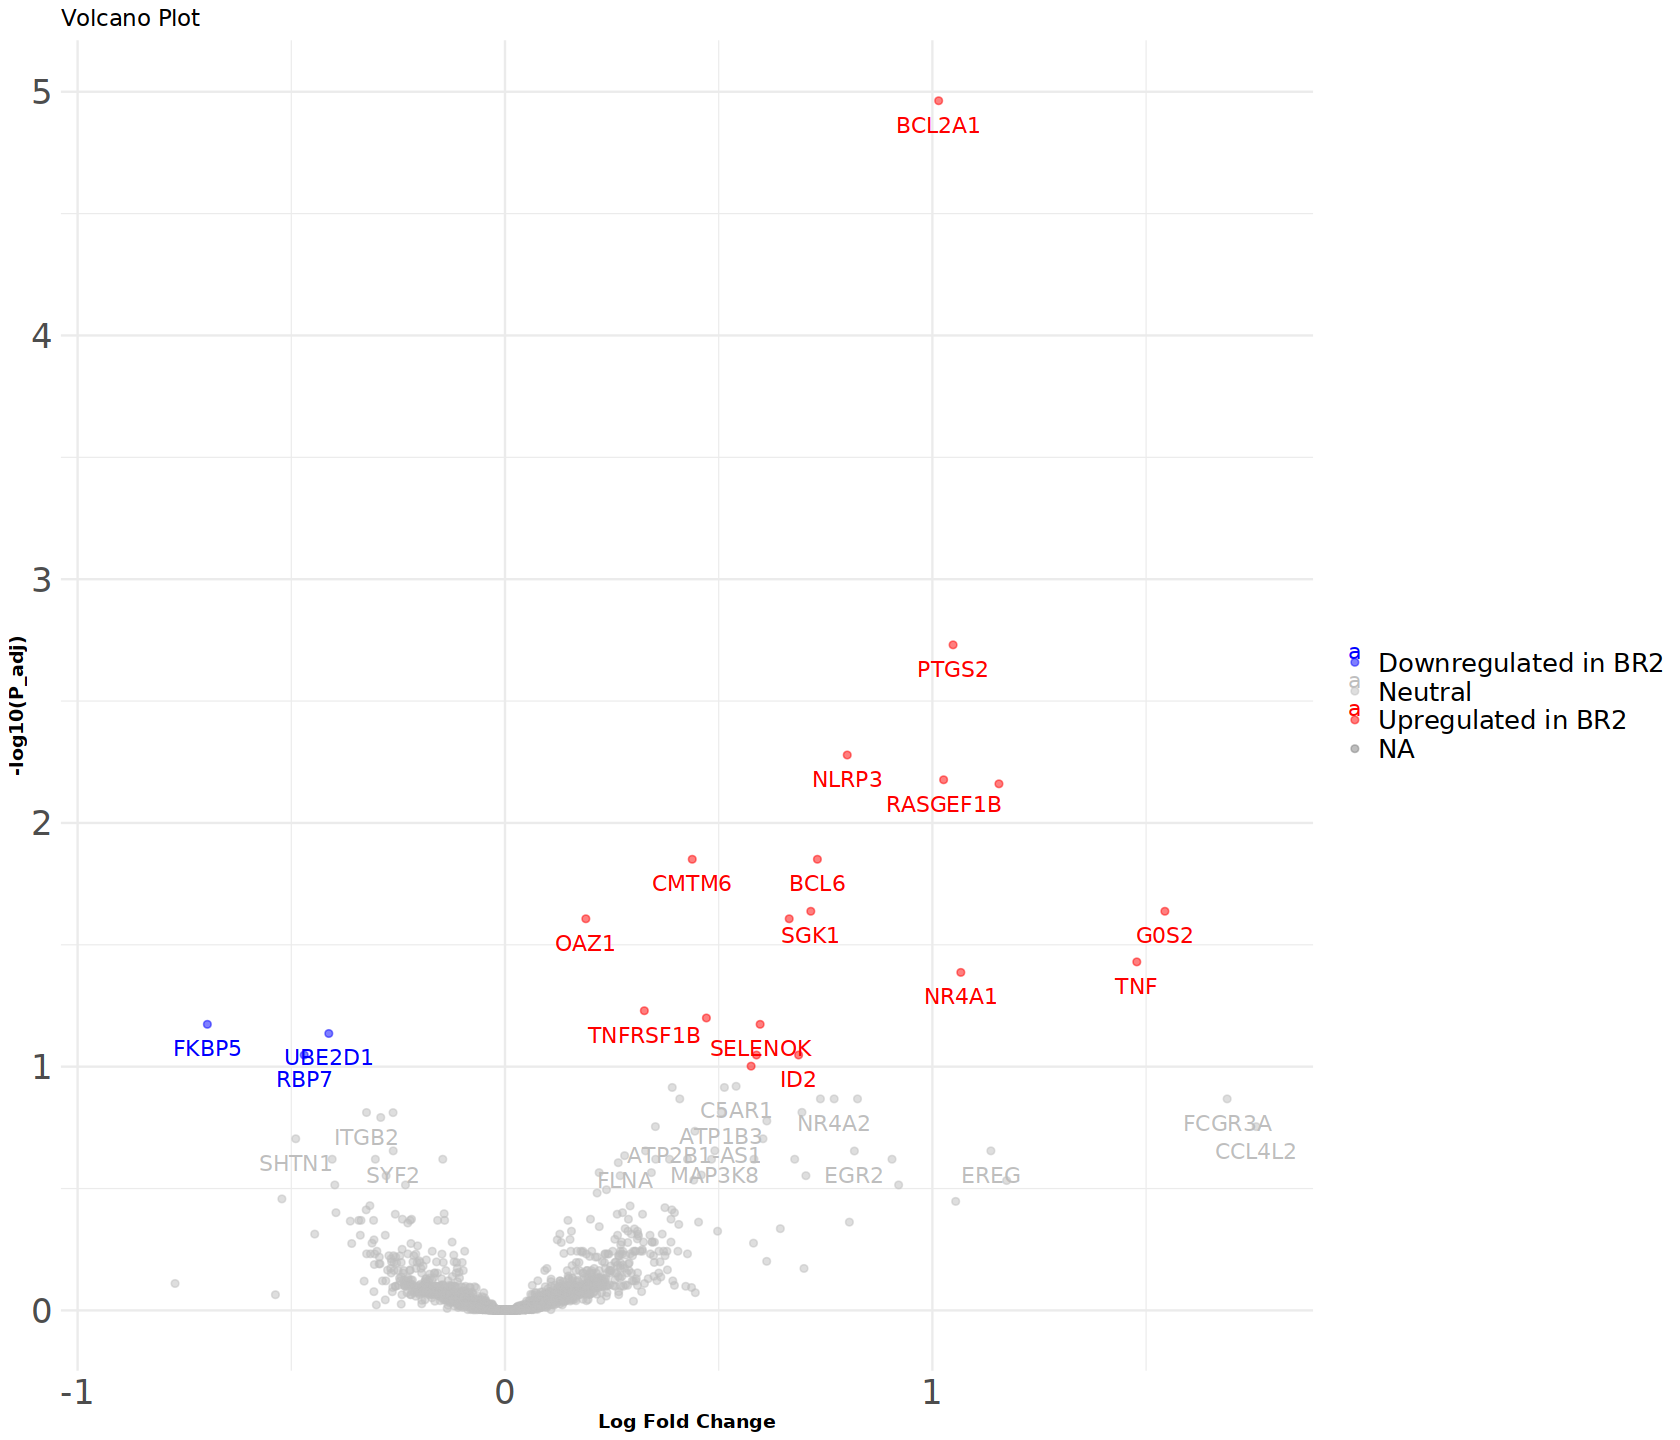

In [345]:
options(repr.plot.width=14, repr.plot.height=12) # Adjust these values as needed


# Classify genes based on fold change and adjusted P-value
data$Color <- ifelse(data$padj < 0.1, ifelse(data$log2FoldChange > 0, "Upregulated in BR2", "Downregulated in BR2"), "Unchanged")


# Sorting data to find top 25 genes by P-value
top_genes <- data[order(data$padj),][1:50,]

# Volcano plot with top 25 genes labeled
ggplot(data, aes(x = log2FoldChange, y = -log10(padj), color = Color)) +
  geom_point(alpha = 0.5) +
  scale_color_manual(values = c("Downregulated in BR2" = "blue", "Upregulated in BR2" = "red", "Neutral" = "grey")) +
  geom_text(data = top_genes, aes(label = X), vjust = 2, hjust = 0.5, size = 4.5, check_overlap = TRUE) +
  theme_minimal() +
  labs(title = "Volcano Plot",
       x = "Log Fold Change",
       y = "-log10(P_adj)")+
#coord_cartesian(xlim = c(-1, 2), ylim = c(0, 10)) +  # Adjust ylim here
            theme(legend.position = "right", legend.title = element_blank(),
                  legend.text = element_text(size=15),
                # text = element_text(size = 10, face = "bold"),  # Make all text bold
                 axis.title = element_text(face = "bold"),  # Make axis titles bold
                 axis.text = element_text(size = 20))
    

# Core CD14 mono volcano plot

In [40]:
#Male
data <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/Core CD14 monocyte_Y1D0.csv")


In [47]:
#Female
data <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female/Core CD14 monocyte_Y1D0.csv")


In [48]:
head(data)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,celltype,Direction,Year
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,SFXN3,255.5642,0.2599405,0.05466410,4.755232,1.982186e-06,0.01177419,Core CD14 monocyte,BR2,Y1
2,PAK1IP1,258.6758,-0.1956412,0.04416625,-4.429655,9.438404e-06,0.01507595,Core CD14 monocyte,BR1,Y1
3,SCAMP2,844.7677,-0.1438431,0.03258861,-4.413907,1.015216e-05,0.01507595,Core CD14 monocyte,BR1,Y1
4,CD300E,2040.1156,0.3123234,0.06949884,4.493937,6.991844e-06,0.01507595,Core CD14 monocyte,BR2,Y1
5,RAD23A,1155.5272,-0.1334182,0.03126920,-4.266762,1.983302e-05,0.02356162,Core CD14 monocyte,BR1,Y1
6,TNFAIP8L2,877.0510,-0.1627051,0.04018377,-4.049025,5.143138e-05,0.02943396,Core CD14 monocyte,BR1,Y1


In [49]:
# Classify genes based on fold change and adjusted P-value
data$Color <- ifelse(data$padj < 0.1, ifelse(data$log2FoldChange > 0, "Upregulated in BR2", "Downregulated in BR2"), "Unchanged")


In [50]:
# # Assuming 'df' is your dataframe and 'column_name' is the name of the column
# rows_with_na <- data[is.na(data$Color), ]

# # View the rows with NA values in the specified column
# print(rows_with_na)

In [51]:
#remove columns that are NAs due to it being NA in padj from deseq2 run
data <- data[complete.cases(data$Color), ]

In [67]:
top <- 13
top_genes <- bind_rows(
  data %>% 
    filter(Color == 'Upregulated in BR2') %>% 
    arrange(padj, desc(abs(log2FoldChange))) %>% 
    head(top),
  data %>% 
    filter(Color == 'Downregulated in BR2') %>% 
    arrange(padj, desc(abs(log2FoldChange))) %>% 
    head(top))

In [68]:
unique(data$Color)

[1] "Upregulated in BR2"   "Downregulated in BR2" "Unchanged"

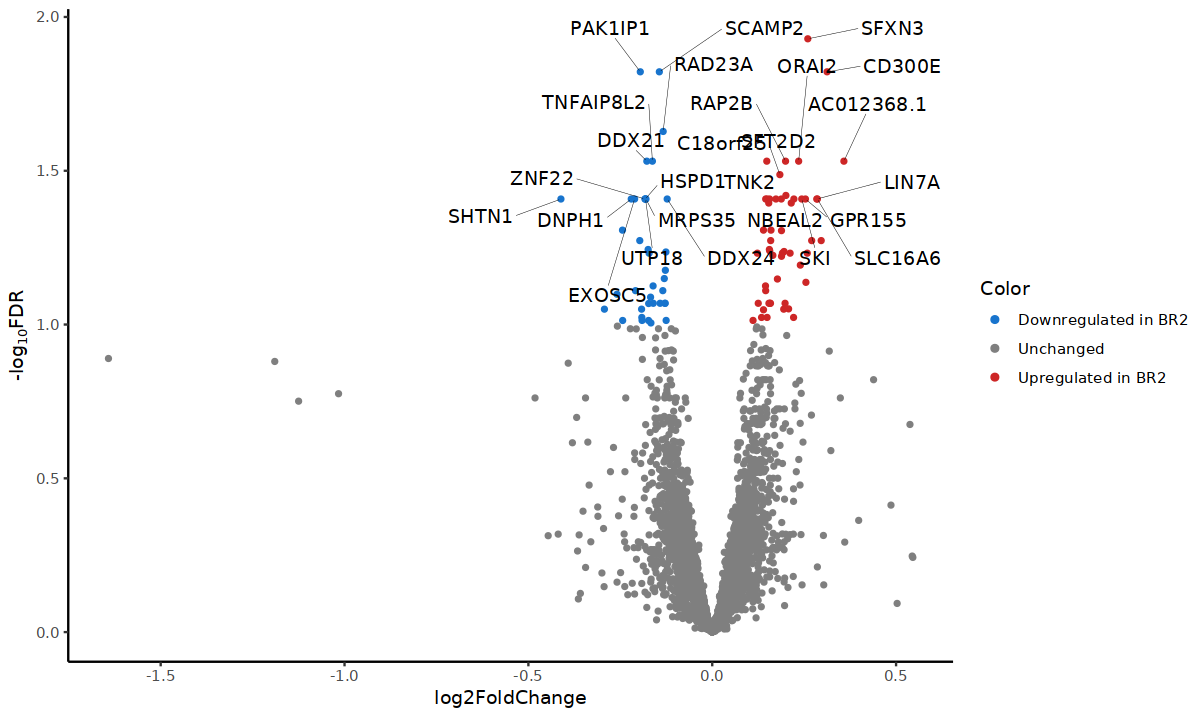

In [69]:


# Sorting data to find top 25 genes by P-value
#top_genes <- data[order(data$padj),][1:50,]

options(repr.plot.width = 10, repr.plot.height = 6)

ggplot(data, aes(log2FoldChange, -log(padj,10))) +
  geom_point(aes(color = Color), size = 1) +
  xlab(expression("log2FoldChange")) + 
  ylab(expression("-log"[10]*"FDR")) +
  scale_color_manual(values = c("Downregulated in BR2"="dodgerblue3", "Unchanged"="gray50", "Upregulated in BR2"="firebrick3")) +
  guides(colour = guide_legend(override.aes = list(size=1.5))) +
  geom_text_repel(data = top_genes,box.padding = 0.5,force= 0.5,max.overlaps=50,
    nudge_x           = 0.15,
    hjust             = 0.1,
    segment.size      = 0.1,
                   mapping = aes(log2FoldChange, -log(padj,10), label = X),
                   size = 4)+theme_classic()

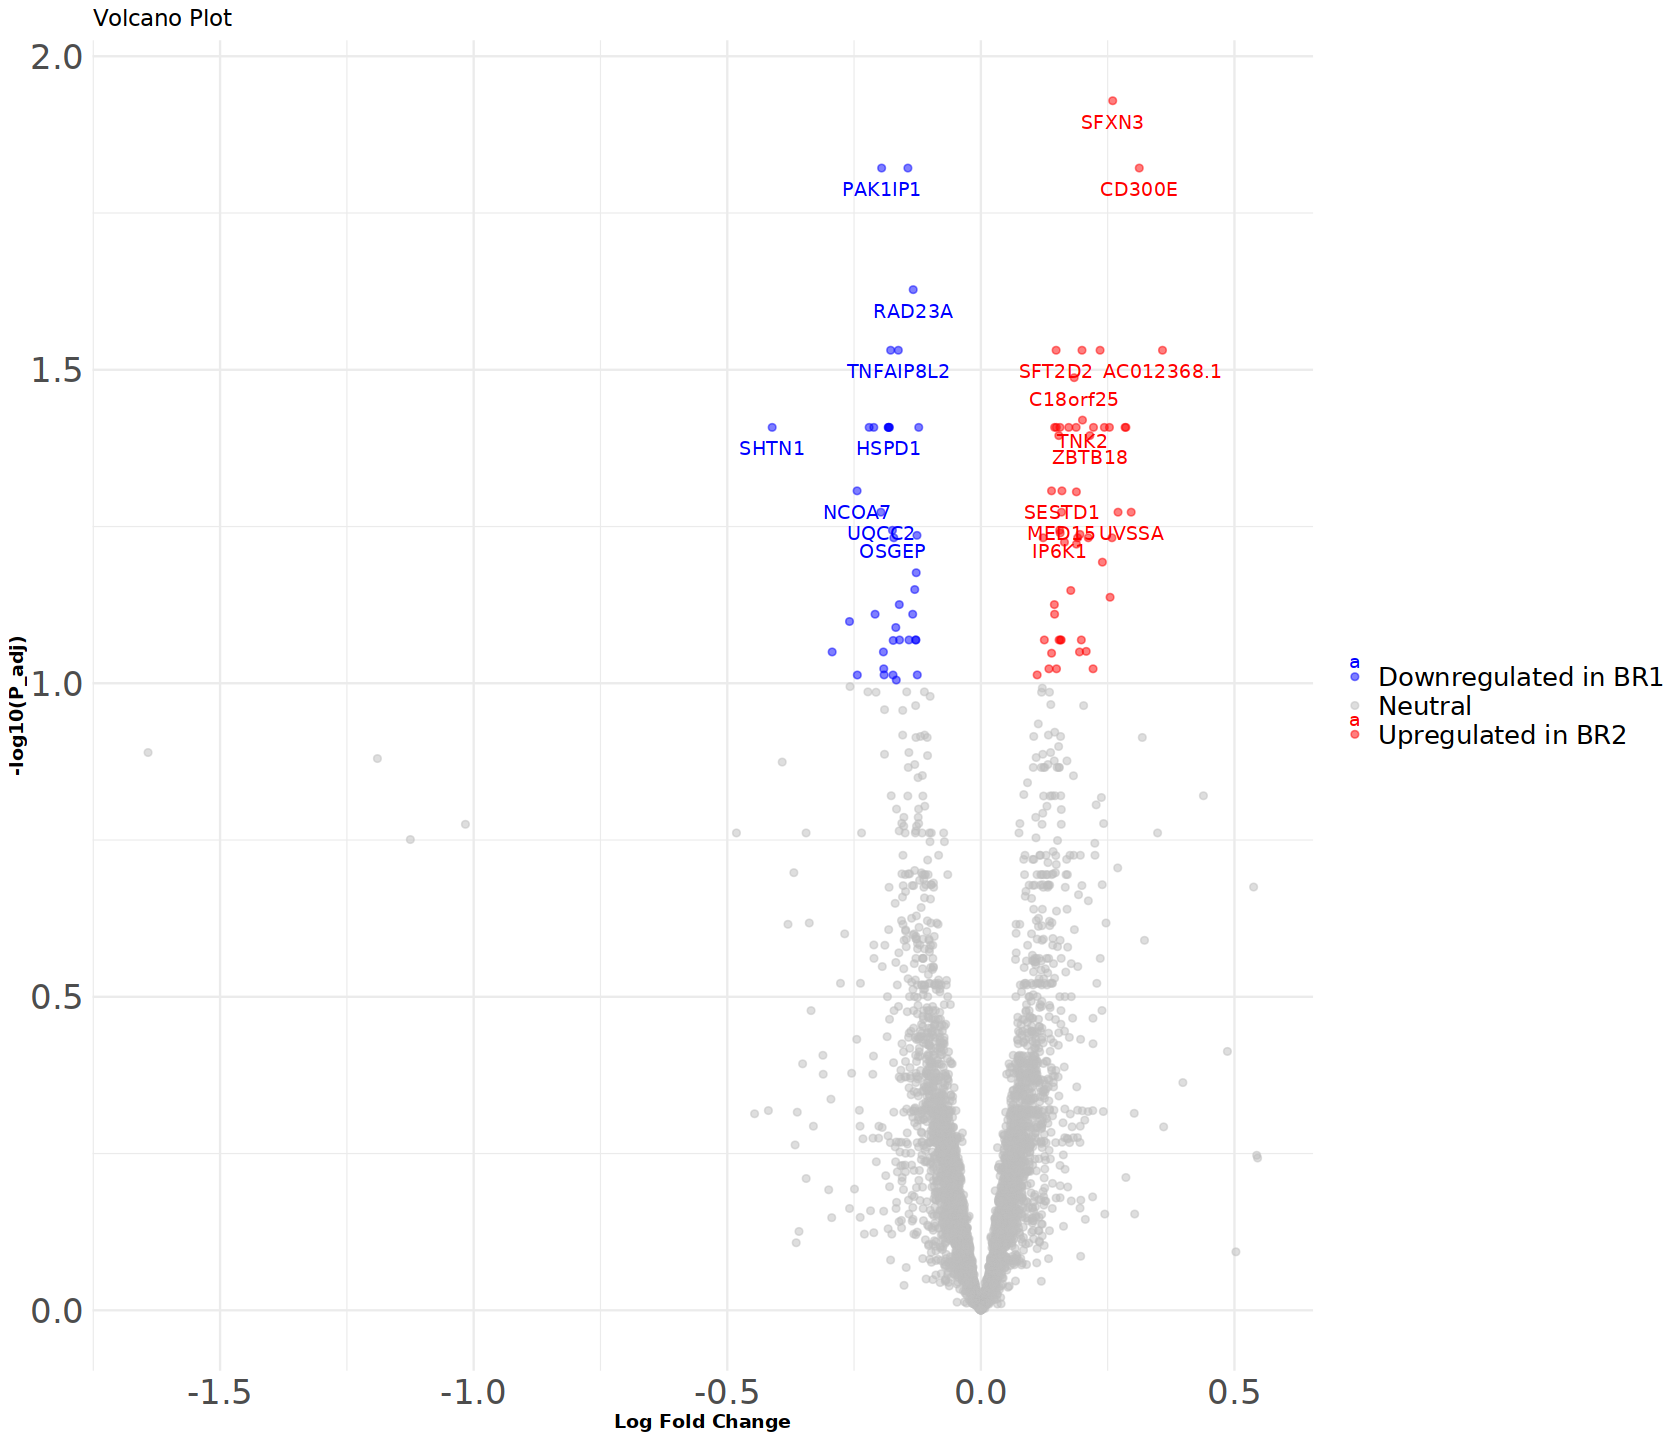

In [277]:
options(repr.plot.width=14, repr.plot.height=12) # Adjust these values as needed


# Classify genes based on fold change and adjusted P-value
data$Color <- ifelse(data$padj < 0.1, ifelse(data$log2FoldChange > 0, "Upregulated in BR2", "Downregulated in BR1"), "Neutral")


# Sorting data to find top 25 genes by P-value
top_genes <- data[order(data$padj),][1:50,]

# Volcano plot with top 25 genes labeled
ggplot(data, aes(x = log2FoldChange, y = -log10(padj), color = Color)) +
  geom_point(alpha = 0.5) +
  scale_color_manual(values = c("Downregulated in BR1" = "blue", "Upregulated in BR2" = "red", "Neutral" = "grey")) +
  geom_text(data = top_genes, aes(label = X), vjust = 2, hjust = 0.5, size = 4, check_overlap = TRUE) +
  theme_minimal() +
  labs(title = "Volcano Plot",
       x = "Log Fold Change",
       y = "-log10(P_adj)")+
#coord_cartesian(xlim = c(-1, 2), ylim = c(0, 10)) +  # Adjust ylim here
            theme(legend.position = "right", legend.title = element_blank(),
                  legend.text = element_text(size=15),
                # text = element_text(size = 10, face = "bold"),  # Make all text bold
                 axis.title = element_text(face = "bold"),  # Make axis titles bold
                 axis.text = element_text(size = 20))
    

# Core CD14 mono volcano plot

In [103]:
#Male
data <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/ISG+ CD14 monocyte_Y1D0.csv")


In [94]:
#Female
data <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female/ISG+ CD14 monocyte_Y1D0.csv")


In [104]:
head(data)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,celltype,Direction,Year
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,EVI2A,591.0595,0.2678099,0.05551030,4.824507,1.403497e-06,0.005786617,ISG+ CD14 monocyte,BR2,Y1
2,ABI3,210.4158,-0.3219652,0.07583166,-4.245789,2.178258e-05,0.044904793,ISG+ CD14 monocyte,BR1,Y1
3,CARHSP1,142.0715,0.3306140,0.08298605,3.983970,6.777337e-05,0.078626377,ISG+ CD14 monocyte,BR2,Y1
4,EIF5A,568.5919,-0.3120221,0.07903670,-3.947813,7.886833e-05,0.078626377,ISG+ CD14 monocyte,BR1,Y1
5,SAP30BP,147.0604,-0.1909208,0.04892737,-3.902127,9.535093e-05,0.078626377,ISG+ CD14 monocyte,BR1,Y1
6,SCNM1,248.0033,-0.1818741,0.04979638,-3.652357,2.598444e-04,0.097394404,ISG+ CD14 monocyte,BR1,Y1


In [105]:
# Classify genes based on fold change and adjusted P-value
data$Color <- ifelse(data$padj < 0.1, ifelse(data$log2FoldChange > 0, "Upregulated in BR2", "Downregulated in BR2"), "Unchanged")


In [106]:
# # Assuming 'df' is your dataframe and 'column_name' is the name of the column
# rows_with_na <- data[is.na(data$Color), ]

# # View the rows with NA values in the specified column
# print(rows_with_na)

In [107]:
#remove columns that are NAs due to it being NA in padj from deseq2 run
data <- data[complete.cases(data$Color), ]

In [108]:
top <- 30
top_genes <- bind_rows(
  data %>% 
    filter(Color == 'Upregulated in BR2') %>% 
    arrange(padj, desc(abs(log2FoldChange))) %>% 
    head(top),
  data %>% 
    filter(Color == 'Downregulated in BR2') %>% 
    arrange(padj, desc(abs(log2FoldChange))) %>% 
    head(top))

In [109]:
unique(data$Color)

[1] "Upregulated in BR2"   "Downregulated in BR2" "Unchanged"

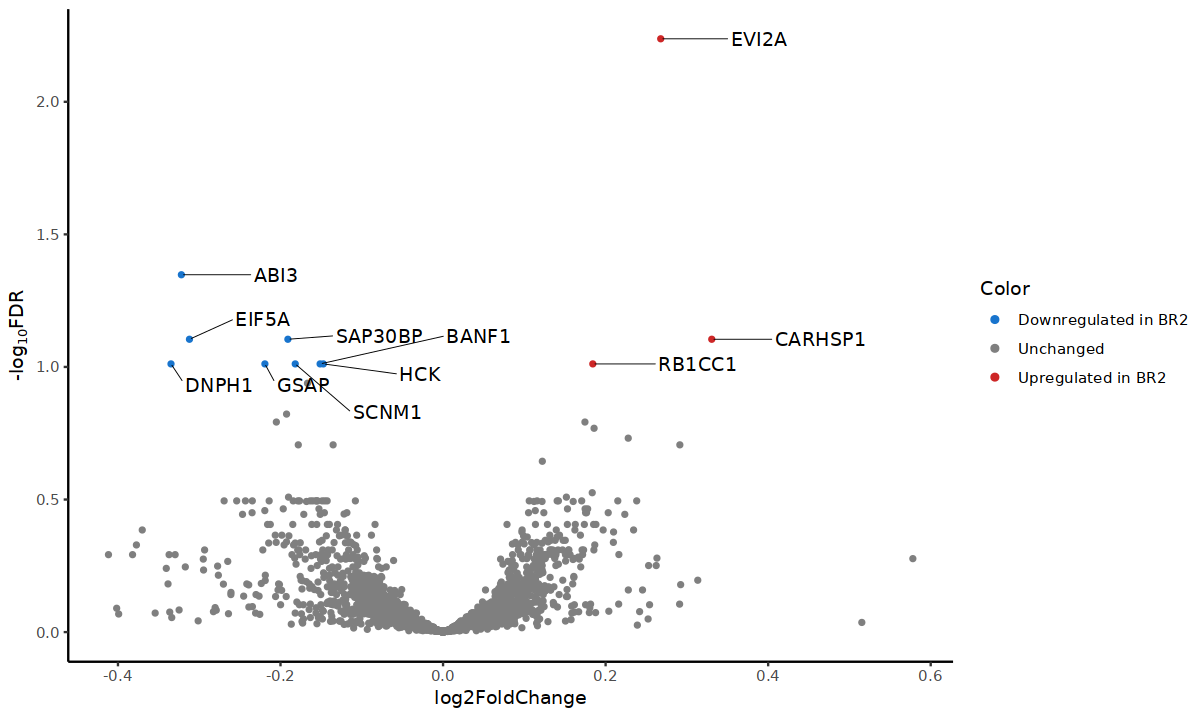

In [110]:


# Sorting data to find top 25 genes by P-value
#top_genes <- data[order(data$padj),][1:50,]

options(repr.plot.width = 10, repr.plot.height = 6)

ggplot(data, aes(log2FoldChange, -log(padj,10))) +
  geom_point(aes(color = Color), size = 1) +
  xlab(expression("log2FoldChange")) + 
  ylab(expression("-log"[10]*"FDR")) +
  scale_color_manual(values = c("Downregulated in BR2"="dodgerblue3", "Unchanged"="gray50", "Upregulated in BR2"="firebrick3")) +
  guides(colour = guide_legend(override.aes = list(size=1.5))) +
  geom_text_repel(data = top_genes,box.padding = 0.5,force= 1,max.overlaps=50,
    nudge_x           = 0.1,
    hjust             = 0.2,
    segment.size      = 0.2,
                   mapping = aes(log2FoldChange, -log(padj,10), label = X),
                   size = 4)+theme_classic()

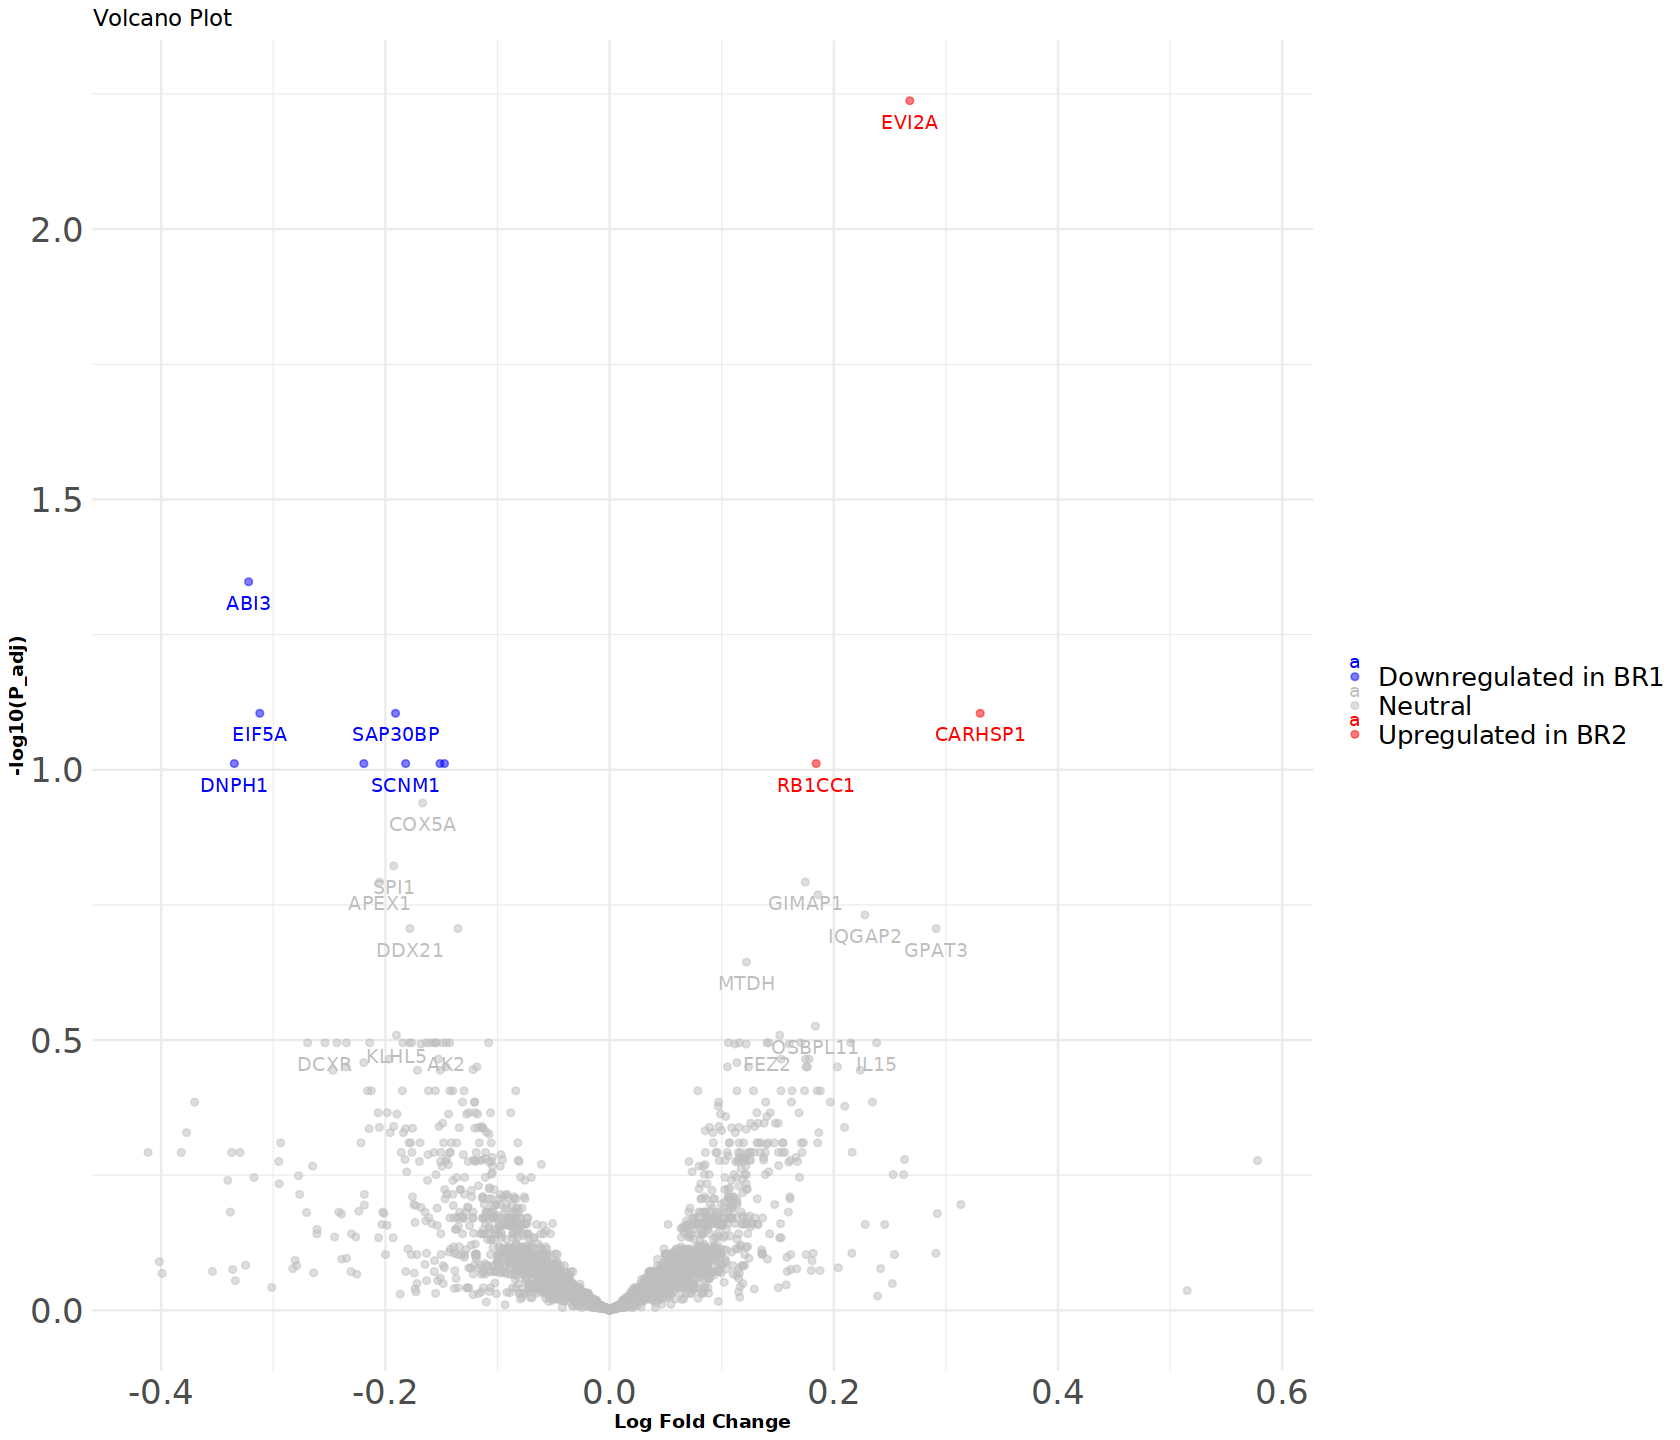

In [111]:
options(repr.plot.width=14, repr.plot.height=12) # Adjust these values as needed


# Classify genes based on fold change and adjusted P-value
data$Color <- ifelse(data$padj < 0.1, ifelse(data$log2FoldChange > 0, "Upregulated in BR2", "Downregulated in BR1"), "Neutral")


# Sorting data to find top 25 genes by P-value
top_genes <- data[order(data$padj),][1:50,]

# Volcano plot with top 25 genes labeled
ggplot(data, aes(x = log2FoldChange, y = -log10(padj), color = Color)) +
  geom_point(alpha = 0.5) +
  scale_color_manual(values = c("Downregulated in BR1" = "blue", "Upregulated in BR2" = "red", "Neutral" = "grey")) +
  geom_text(data = top_genes, aes(label = X), vjust = 2, hjust = 0.5, size = 4, check_overlap = TRUE) +
  theme_minimal() +
  labs(title = "Volcano Plot",
       x = "Log Fold Change",
       y = "-log10(P_adj)")+
#coord_cartesian(xlim = c(-1, 2), ylim = c(0, 10)) +  # Adjust ylim here
            theme(legend.position = "right", legend.title = element_blank(),
                  legend.text = element_text(size=15),
                # text = element_text(size = 10, face = "bold"),  # Make all text bold
                 axis.title = element_text(face = "bold"),  # Make axis titles bold
                 axis.text = element_text(size = 20))
    